In [1]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
!git clone https://github.com/fizyr/keras-retinanet.git

In [3]:
# !pip install -r  /content/keras-retinanet/requirements.txt

In [4]:
!pip install keras_retinanet

In [6]:
# !unzip /content/datasetspine.zip

processing time:  7.963180541992188e-05


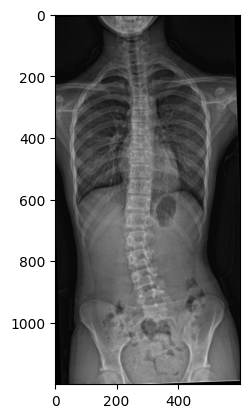

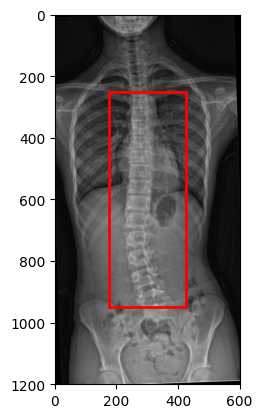

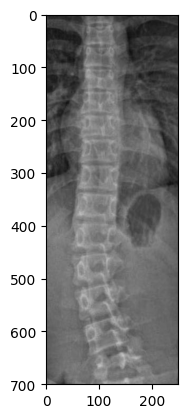

In [60]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load necessary modules
import sys
sys.path.insert(0, '/content/keras-retinanet')


# import keras_retinanet
# from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf


model_path = os.path.join('..', 'snapshots', 'resnet50_coco_best_v2.1.0.h5')

# load retinanet model
# model = models.load_model(model_path, backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# model = models.convert_model(model)

#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {0: 'spine'}

# ## Run detection on example

# In[ ]:


inputs='/content/dataspinal/ori/1001.jpg'
# load image
image1 = cv2.imread(inputs)

# copy to draw on
draw = image1.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image1 = preprocess_image(image1)
image1, scale = resize_image(image1)

# process image
start = time.time()
# boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
# boxes /= scale



# Crop the image based on the bounding box

# Load the image
image1 = cv2.imread(inputs)

plt.imshow(image1)

# Get image dimensions
height, width, _ = image1.shape

# Specify the width and height of the bounding box
box_width = 250
box_height = 700

# Calculate the top-left coordinates of the bounding box to center it vertically
x = width // 2 - box_width // 2
y = height // 2 - box_height // 2

# Create a figure and axis
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))

# Create a rectangle patch representing the bounding box
rect = patches.Rectangle((x, y), box_width, box_height, linewidth=2, edgecolor='r', facecolor='none')

# Add the rectangle to the axis
ax.add_patch(rect)

# Set axis limits
ax.set_xlim(0, width)
ax.set_ylim(height, 0)


# Show the image with the bounding box
plt.show()

cropped_image = image1[y:y + box_height, x:x + box_width]

# Create a figure and axis
fig, ax = plt.subplots(1)

# Display the cropped image
ax.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# Set axis limits
ax.set_xlim(0, box_width)
ax.set_ylim(box_height, 0)

# Show the cropped image
plt.show()



In [8]:
# !unzip /content/drive/MyDrive/Liver_Dataset1.zip

In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import sys
from PIL import Image

In [62]:
masks = glob.glob("/content/datasetspine/modified_mask/*.png")


In [63]:
masks=sorted(masks)

In [64]:
orgs = glob.glob("/content/datasetspine/modified_ori/*.jpg")


In [65]:
orgs=sorted(orgs)

import cv2

In [66]:
imgs_list = []
masks_list = []
for image, mask in zip(orgs, masks):

    print(image)
    print(mask)
    # imgs_list.append(np.array(Image.open(image).resize((512,512))))
    imgs_list.append([np.array(Image.open(image).convert('L').resize((512,512)))])


    im = Image.open(mask).resize((512,512))

    # bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)


    #im_cropped = im.crop((left, top, right, bottom))
    masks_list.append(np.array(im))

imgs_np = np.asarray(imgs_list)
masks_np = np.asarray(masks_list)

/content/datasetspine/modified_ori/1.jpg
/content/datasetspine/modified_mask/1.png
/content/datasetspine/modified_ori/2.jpg
/content/datasetspine/modified_mask/2.png
/content/datasetspine/modified_ori/modified_1_rot1.jpg
/content/datasetspine/modified_mask/modified_1_rot1.png
/content/datasetspine/modified_ori/modified_1_rot2.jpg
/content/datasetspine/modified_mask/modified_1_rot2.png
/content/datasetspine/modified_ori/modified_1_rot3.jpg
/content/datasetspine/modified_mask/modified_1_rot3.png
/content/datasetspine/modified_ori/modified_1_rot4.jpg
/content/datasetspine/modified_mask/modified_1_rot4.png
/content/datasetspine/modified_ori/modified_1_rot5.jpg
/content/datasetspine/modified_mask/modified_1_rot5.png
/content/datasetspine/modified_ori/modified_2_rot1.jpg
/content/datasetspine/modified_mask/modified_2_rot1.png
/content/datasetspine/modified_ori/modified_2_rot2.jpg
/content/datasetspine/modified_mask/modified_2_rot2.png
/content/datasetspine/modified_ori/modified_2_rot3.jpg
/c

In [67]:
image_sizeR=256
image_sizeC=512

In [68]:
imgs_list = []
masks_list = []

for image, mask in zip(orgs, masks):
    # Open, convert to grayscale, and resize the image
    img = np.array(Image.open(image).convert('L').resize((image_sizeR, image_sizeC)))
    imgs_list.append(img)

    # Open and resize the mask
    mask_img = np.array(Image.open(mask).resize((image_sizeR, image_sizeC)))
    masks_list.append(mask_img)

imgs_np = np.asarray(imgs_list)
masks_np = np.asarray(masks_list)

print(imgs_np.shape)   # Should print (12, 512, 512)
print(masks_np.shape)  # Should print (12, 512, 512)


(12, 512, 256)
(12, 512, 256)


In [69]:
print(imgs_np.shape, masks_np.shape)

(12, 512, 256) (12, 512, 256)


In [70]:
import albumentations as A
import cv2

transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])
transformed = transform(image=imgs_np, mask=masks_np)
transformed_image = transformed['image']
transformed_mask = transformed['mask']

In [71]:
imgs_np1=np.concatenate([imgs_np,transformed_image],axis=0)
masks_np1=np.concatenate([masks_np,transformed_mask],axis=0)


In [20]:
# masks_np1=(masks_np1==63)==1

# masks_np1=masks_np1.astype(int)


In [72]:
np.array(imgs_np1).shape

(24, 512, 256)

In [73]:
## Imports
import os
import sys
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

## Seeding
seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed

## Hyperparameters

In [23]:
# r = random.randint(0, 10-1)

# fig = plt.figure()
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
# ax = fig.add_subplot(1, 2, 1)
# ax.imshow(10)
# ax = fig.add_subplot(1, 2, 2)
# ax.imshow(np.reshape(y[r], (image_size, image_size)), cmap="gray")

In [74]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([us, skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

In [75]:
image_sizeC=256
image_sizeR=512

In [26]:
# image_size=512

## Full UNet Model

In [76]:
def WNet():
    f = [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((image_sizeR, image_sizeC, 1))

    p0 = inputs
    c1, p1 = down_block(p0, f[0]) #128 -> 64
    c2, p2 = down_block(p1, f[1]) #64 -> 32
    c3, p3 = down_block(p2, f[2]) #32 -> 16
    c4, p4 = down_block(p3, f[3]) #16->8

    bn = bottleneck(p4, f[4])

    u1 = up_block(bn, c4, f[3]) #8 -> 16
    u2 = up_block(u1, c3, f[2]) #16 -> 32
    u3 = up_block(u2, c2, f[1]) #32 -> 64
    u4 = up_block(u3, c1, f[0]) #64 -> 128

    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = keras.models.Model(inputs, outputs)
    return model

In [77]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_block(inputs, filters, kernel_size=(3, 3), padding="same", strides=1, name_prefix=""):
    conv1 = layers.Conv2D(filters, kernel_size, activation='relu', padding=padding, strides=strides, name=f"{name_prefix}_conv1")(inputs)
    conv2 = layers.Conv2D(filters, kernel_size, activation='relu', padding=padding, strides=strides, name=f"{name_prefix}_conv2")(conv1)
    pool = layers.MaxPooling2D((2, 2), name=f"{name_prefix}_pool")(conv2)
    return conv2, pool

def upsample_block(inputs, skip, filters, kernel_size=(3, 3), padding="same", strides=1, name_prefix=""):
    upsampled = layers.UpSampling2D((2, 2), name=f"{name_prefix}_upsampled")(inputs)
    concat = layers.Concatenate(axis=-1, name=f"{name_prefix}_concat")([upsampled, skip])
    conv1 = layers.Conv2D(filters, kernel_size, activation='relu', padding=padding, strides=strides, name=f"{name_prefix}_upconv1")(concat)
    conv2 = layers.Conv2D(filters, kernel_size, activation='relu', padding=padding, strides=strides, name=f"{name_prefix}_upconv2")(conv1)
    return conv2

def build_unet(input_shape=(512, 256, 1), base_filters=64, name_prefix=""):
    inputs = layers.Input(input_shape, name=f"{name_prefix}_input")

    # Encoder
    conv1, pool1 = unet_block(inputs, base_filters, name_prefix=f"{name_prefix}_enc1")
    conv2, pool2 = unet_block(pool1, base_filters * 2, name_prefix=f"{name_prefix}_enc2")
    conv3, pool3 = unet_block(pool2, base_filters * 4, name_prefix=f"{name_prefix}_enc3")

    # Decoder
    up4 = upsample_block(conv3, conv2, base_filters * 2, name_prefix=f"{name_prefix}_dec1")
    up5 = upsample_block(up4, conv1, base_filters, name_prefix=f"{name_prefix}_dec2")

    # Output layer
    output = layers.Conv2D(1, (1, 1), activation='sigmoid', name=f"{name_prefix}_output")(up5)

    model = models.Model(inputs=inputs, outputs=output, name=f"{name_prefix}_U-Net")
    return model

def wnets(image_sizeR=1024, image_sizeC=512, base_filters=64):
    left_input = layers.Input((image_sizeR, image_sizeC, 1), name="left_input")
    right_input = layers.Input((image_sizeR, image_sizeC, 1), name="right_input")

    # Left U-Net
    left_u_net = build_unet(base_filters=base_filters, name_prefix="left")(left_input)

    # Right U-Net
    right_u_net = build_unet(base_filters=base_filters, name_prefix="right")(right_input)

    # Concatenate the outputs of the two U-Nets
    concat_output = layers.Concatenate(axis=-1, name="concatenated_output")([left_u_net, right_u_net])

    # Final Convolutional layer
    final_output = layers.Conv2D(1, (1, 1), activation='sigmoid', name="final_output")(concat_output)

    model = models.Model(inputs=[left_input, right_input], outputs=final_output, name="W-Net")
    return model

# Create and compile the W-Net model
model = wnets()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Display the summary of the model
model.summary()


Model: "W-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 left_input (InputLayer)     [(None, 1024, 512, 1)]       0         []                            
                                                                                                  
 right_input (InputLayer)    [(None, 1024, 512, 1)]       0         []                            
                                                                                                  
 left_U-Net (Functional)     (None, 512, 256, 1)          1881985   ['left_input[0][0]']          
                                                                                                  
 right_U-Net (Functional)    (None, 512, 256, 1)          1881985   ['right_input[0][0]']         
                                                                                              

In [78]:
from tensorflow import keras
from tensorflow.keras import layers


# opt = keras.optimizers.Adam(learning_rate=0.01)
# model.compile(loss='categorical_crossentropy', optimizer=opt)

model = WNet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])


In [79]:
imgs_np1.shape

(24, 512, 256)

## Training the model

In [80]:
x = np.asarray(imgs_np1, dtype=np.float32)/255
y = np.asarray(masks_np1, dtype=np.float32)/255

In [81]:
y = y.reshape(y.shape[0], y.shape[1], y.shape[2], 1)
# print(x.shape, y.shape)

In [82]:
x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)
print(x.shape, y.shape)

(24, 512, 256, 1) (24, 512, 256, 1)


In [83]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (19, 512, 256, 1)
y_train:  (19, 512, 256, 1)
x_val:  (5, 512, 256, 1)
y_val:  (5, 512, 256, 1)


In [84]:
outs=model.fit(x_train,y_train,validation_data=(x_val,y_val),steps_per_epoch=10,epochs=100)

Epoch 1/100
10/10 [==============================] - 6s 89ms/step - loss: 0.6805 - acc: 0.6240 - val_loss: 0.7556 - val_acc: 0.7235
Epoch 2/100
10/10 [==============================] - 0s 41ms/step - loss: 0.6345 - acc: 0.7306 - val_loss: 0.6058 - val_acc: 0.7235
Epoch 3/100
10/10 [==============================] - 0s 41ms/step - loss: 0.5641 - acc: 0.7306 - val_loss: 0.5031 - val_acc: 0.7235
Epoch 4/100
10/10 [==============================] - 0s 41ms/step - loss: 0.4734 - acc: 0.7306 - val_loss: 0.4992 - val_acc: 0.7235
Epoch 5/100
10/10 [==============================] - 0s 47ms/step - loss: 0.4181 - acc: 0.7306 - val_loss: 0.3990 - val_acc: 0.7235
Epoch 6/100
10/10 [==============================] - 0s 41ms/step - loss: 0.3753 - acc: 0.7306 - val_loss: 0.3941 - val_acc: 0.7235
Epoch 7/100
10/10 [==============================] - 0s 41ms/step - loss: 0.3631 - acc: 0.7306 - val_loss: 0.3666 - val_acc: 0.7235
Epoch 8/100
10/10 [==============================] - 0s 41ms/step - loss: 0.

In [85]:

input_shape = x_train[0].shape
input_shape


(512, 256, 1)

In [86]:
y_val[1].shape

(512, 256, 1)

In [87]:
cropped_image

array([[[ 66,  66,  66],
        [ 66,  66,  66],
        [ 62,  62,  62],
        ...,
        [ 42,  42,  42],
        [ 41,  41,  41],
        [ 43,  43,  43]],

       [[ 63,  63,  63],
        [ 61,  61,  61],
        [ 58,  58,  58],
        ...,
        [ 40,  40,  40],
        [ 40,  40,  40],
        [ 40,  40,  40]],

       [[ 59,  59,  59],
        [ 55,  55,  55],
        [ 53,  53,  53],
        ...,
        [ 40,  40,  40],
        [ 39,  39,  39],
        [ 36,  36,  36]],

       ...,

       [[114, 114, 114],
        [112, 112, 112],
        [111, 111, 111],
        ...,
        [ 99,  99,  99],
        [ 92,  92,  92],
        [ 84,  84,  84]],

       [[115, 115, 115],
        [115, 115, 115],
        [115, 115, 115],
        ...,
        [ 97,  97,  97],
        [ 90,  90,  90],
        [ 82,  82,  82]],

       [[115, 115, 115],
        [115, 115, 115],
        [116, 116, 116],
        ...,
        [ 97,  97,  97],
        [ 89,  89,  89],
        [ 77,  77,  77]]

In [88]:
type(cropped_image)

numpy.ndarray

In [89]:
import numpy as np
from keras.models import load_model
from PIL import Image
# Assuming you have the image variable named 'cropped_image'
# Make sure it is a numpy array and preprocess it as needed

# Resize the image to match the expected input shape
target_size = (256, 512)  # Adjust the target size based on your model's requirements
cropped_image_resized = np.array(Image.fromarray(cropped_image).resize(target_size))

# If your model expects a single channel (grayscale), convert to grayscale
cropped_image_gray = np.mean(cropped_image_resized, axis=-1, keepdims=True)

# Normalize the pixel values to the range [0, 1]
cropped_image_normalized = cropped_image_gray / 255.0

# Expand dimensions to match the expected input shape
cropped_image_expanded = np.expand_dims(cropped_image_normalized, axis=0)

# Make predictions
predictions1 = model.predict(cropped_image_expanded)

# Display or use the predictions as needed
print(predictions1)


1/1 [==============================] - 0s 186ms/step
[[[[2.4380797e-06]
   [6.0084009e-09]
   [5.9256100e-11]
   ...
   [3.4043662e-06]
   [5.1823381e-04]
   [2.4772050e-02]]

  [[5.5958012e-09]
   [3.5129541e-13]
   [1.0859660e-15]
   ...
   [1.3669457e-10]
   [7.7174306e-08]
   [3.1958512e-04]]

  [[2.6904295e-10]
   [8.8314683e-16]
   [2.8456678e-18]
   ...
   [3.8861969e-12]
   [4.7587152e-09]
   [7.2453193e-05]]

  ...

  [[6.4806091e-11]
   [1.6139836e-17]
   [1.7766188e-20]
   ...
   [1.8206073e-16]
   [2.3908440e-12]
   [8.3391762e-07]]

  [[5.5522563e-08]
   [3.6892559e-13]
   [4.6201777e-16]
   ...
   [1.7053935e-12]
   [1.2995095e-09]
   [4.8928283e-05]]

  [[6.4571759e-05]
   [8.0236028e-08]
   [6.2690531e-10]
   ...
   [3.3282213e-08]
   [5.1484963e-06]
   [1.7286447e-03]]]]


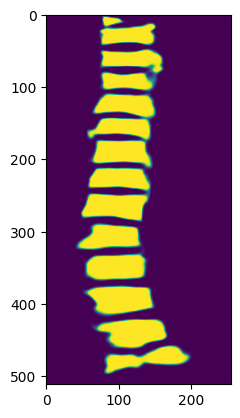

In [90]:
plt.imshow(predictions1[0])

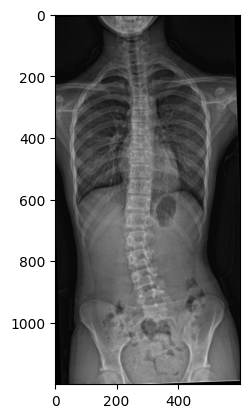

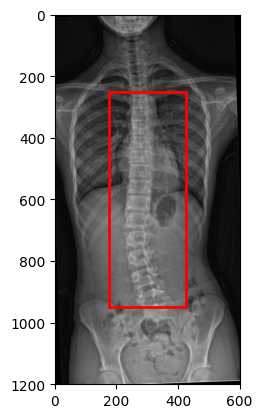

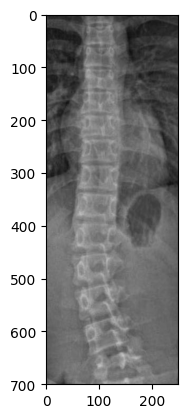

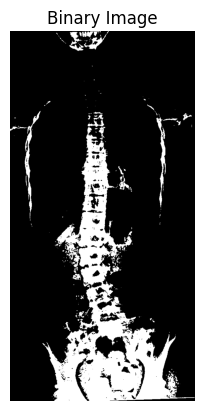

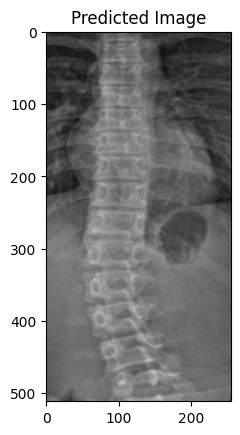

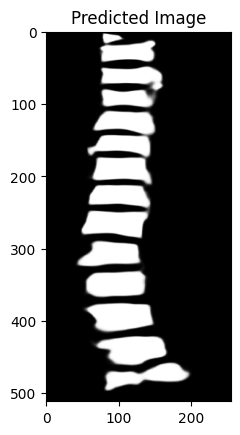

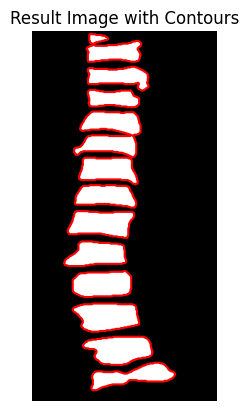

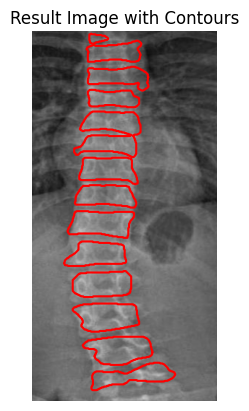

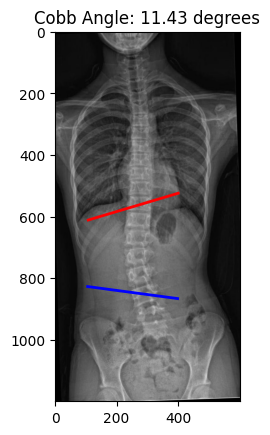

In [91]:


# Crop the image based on the bounding box

# Load the image
image1 = cv2.imread(inputs)

plt.imshow(image1)

# Get image dimensions
height, width, _ = image1.shape

# Specify the width and height of the bounding box
box_width = 250
box_height = 700

# Calculate the top-left coordinates of the bounding box to center it vertically
x = width // 2 - box_width // 2
y = height // 2 - box_height // 2

# Create a figure and axis
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))

# Create a rectangle patch representing the bounding box
rect = patches.Rectangle((x, y), box_width, box_height, linewidth=2, edgecolor='r', facecolor='none')

# Add the rectangle to the axis
ax.add_patch(rect)

# Set axis limits
ax.set_xlim(0, width)
ax.set_ylim(height, 0)




# Show the image with the bounding box
plt.show()

cropped_image = image1[y:y + box_height, x:x + box_width]

# Create a figure and axis
fig, ax = plt.subplots(1)

# Display the cropped image
ax.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# Set axis limits
ax.set_xlim(0, box_width)
ax.set_ylim(box_height, 0)

# Show the cropped image
plt.show()


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the image variable named 'cropped_image'
# Make sure it is a numpy array (if not, convert it to one)

# Convert to grayscale
gray_image = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, binary_image = cv2.threshold(gray_image, 120, 255, cv2.THRESH_BINARY)


# Binary Image
plt.figure(2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')


# # Create a figure and axis
# fig, ax = plt.subplots(1)

# # Display the image
# ax.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))

# # Create a rectangle patch representing the bounding box
# rect = patches.Rectangle((x, y), box_width, box_height, linewidth=2, edgecolor='r', facecolor='none')

# # Add the rectangle to the axis
# ax.add_patch(rect)

# # Set axis limits
# ax.set_xlim(0, width)
# ax.set_ylim(height, 0)




plt.figure(3)
plt.imshow(np.array(np.squeeze(cropped_image_resized )), cmap="gray")
plt.title("Predicted Image")

plt.show()


plt.figure(4)
plt.imshow(np.array(np.squeeze(predictions1)), cmap="gray")
plt.title("Predicted Image")

plt.show()



plt.figure(5)
result_binary = np.reshape(predictions1 > 0.5, (image_sizeR, image_sizeC))
plt.imshow(result_binary, cmap='gray')  # Use result_binary instead of predictions1
contour_result = plt.contour(result_binary, levels=[0.5], colors='red')
plt.title('Result Image with Contours')
plt.axis('off')
plt.show()



plt.figure(5)
result_binary = np.reshape(predictions1 > 0.5, (image_sizeR, image_sizeC))
plt.imshow(cropped_image_resized , cmap='gray')  # Use result_binary instead of predictions1
contour_result = plt.contour(result_binary, levels=[0.5], colors='red')
plt.title('Result Image with Contours')
plt.axis('off')
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

# Assuming result_binary is the binary image obtained from predictions
# Ensure that result_binary contains 0 and 1 values (dtype should be boolean or integer)

# Label connected components in the binary image
label_image = measure.label(result_binary)

# Get region properties (assuming each vertebra is a separate region)
regions = measure.regionprops(label_image)

# Sort regions by area to get the two largest regions (assuming vertebrae)
sorted_regions = sorted(regions, key=lambda x: x.area, reverse=True)[:2]

# Assuming two vertebrae for simplicity (adjust as needed)
superior_endplate = sorted_regions[0].bbox  # Upper vertebra
inferior_endplate = sorted_regions[1].bbox  # Lower vertebra

# Fit lines along the endplates (e.g., linear regression)
superior_line = np.polyfit([superior_endplate[0], superior_endplate[2]],
                           [superior_endplate[1], superior_endplate[3]], 1)
inferior_line = np.polyfit([inferior_endplate[0], inferior_endplate[2]],
                           [inferior_endplate[1], inferior_endplate[3]], 1)

# Calculate Cobb angle
cobb_angle = np.degrees(np.arctan(np.abs((inferior_line[0] - superior_line[0]) /
                                         (1 + inferior_line[0] * superior_line[0]))))

# Display the binary image with lines and Cobb angle
plt.imshow(image1, cmap='gray')
plt.plot([superior_endplate[1]+50, superior_endplate[3]+250],
         [superior_endplate[0]+500, superior_endplate[2]+350], color='red', linewidth=2)
plt.plot([inferior_endplate[1]+50, inferior_endplate[3]+250],
         [inferior_endplate[0]+450, inferior_endplate[2]+450], color='blue', linewidth=2)
plt.title(f'Cobb Angle: {cobb_angle:.2f} degrees')
plt.show()



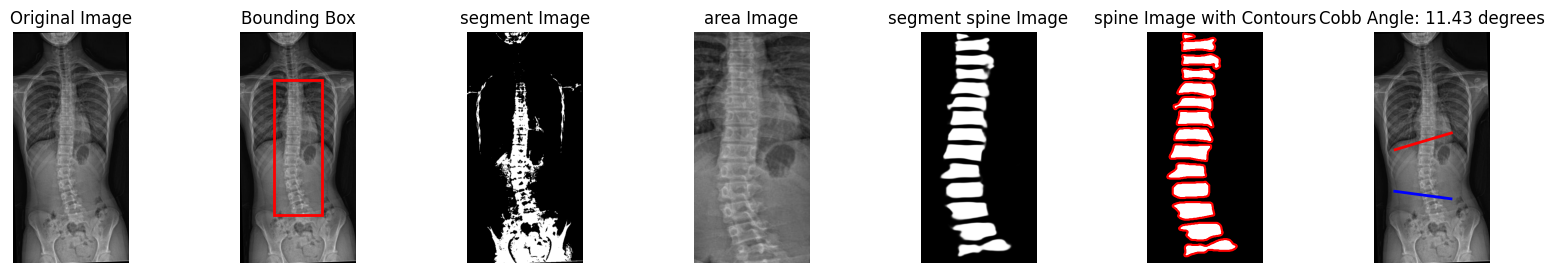

In [92]:


# Create subplots
fig, axes = plt.subplots(1, 7, figsize=(20, 3))

# Display the images and visualizations
axes[0].imshow(image1)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[2].imshow(binary_image, cmap='gray')
axes[2].set_title('segment Image')
axes[2].axis('off')

axes[1].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axes[1].add_patch(patches.Rectangle((x, y), box_width, box_height, linewidth=2, edgecolor='r', facecolor='none'))
axes[1].set_title('Bounding Box')
axes[1].axis('off')

axes[3].imshow(np.array(np.squeeze(cropped_image_resized)), cmap="gray")
axes[3].set_title('area Image')
axes[3].axis('off')

axes[4].imshow(np.array(np.squeeze(predictions1)), cmap="gray")
axes[4].set_title('segment spine Image')
axes[4].axis('off')

result_binary = np.reshape(predictions1 > 0.5, (image_sizeR, image_sizeC))
contour_result = axes[5].contour(result_binary, levels=[0.5], colors='red')
axes[5].imshow(result_binary, cmap='gray')
axes[5].set_title('spine Image with Contours')
axes[5].axis('off')

# Cobb angle visualization
axes[6].imshow(image1, cmap='gray')
axes[6].plot([superior_endplate[1]+50, superior_endplate[3]+250],
             [superior_endplate[0]+500, superior_endplate[2]+350], color='red', linewidth=2)
axes[6].plot([inferior_endplate[1]+50, inferior_endplate[3]+250],
             [inferior_endplate[0]+450, inferior_endplate[2]+450], color='blue', linewidth=2)
axes[6].set_title(f'Cobb Angle: {cobb_angle:.2f} degrees')
axes[6].axis('off')

plt.show()

## Testing the model

In [93]:
## Save the Weights
# model.save_weights("UNetW.h5")

## Dataset for prediction
# x, y = valid_gen.__getitem__(1)
result = model.predict(x_train)


1/1 [==============================] - 0s 27ms/step


In [94]:
result=result

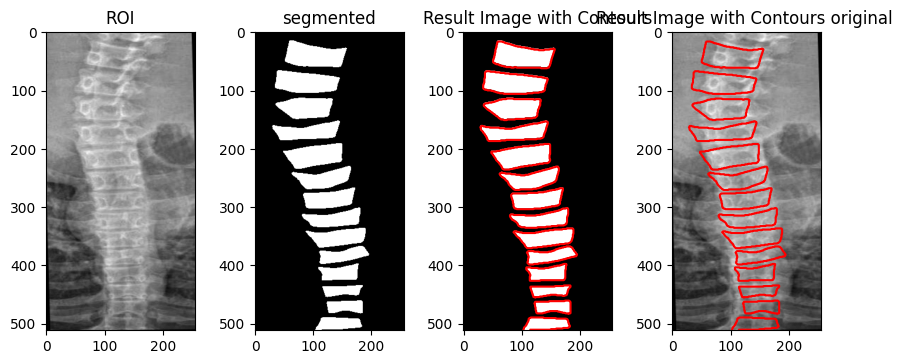

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_val[3] and result[3] are your images

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# # Plot the original image with contours in red
# axes[0].imshow(np.reshape(y_val[3] * 255, (image_sizeR, image_sizeC)), cmap="gray")
# contour_original = axes[0].contour(np.reshape(y_val[3] * 255, (image_sizeR, image_sizeC)), levels=[0.5], colors='red')
# axes[0].clabel(contour_original, inline=True, fontsize=8)

# axes[0].set_title("Original Image with Contours")

axes[0].imshow(np.reshape(x_val[3], (image_sizeR, image_sizeC)), cmap="gray")
axes[0].set_title("ROI")

axes[1].imshow(np.reshape(result[3]>0.5, (image_sizeR, image_sizeC)), cmap="gray")
axes[1].set_title("segmented")


# Plot the result image with contours in red
axes[2].imshow(np.reshape(result[3] > 0.5, (image_sizeR, image_sizeC)), cmap="gray")
contour_result = axes[2].contour(np.reshape(result[3] > 0.5, (image_sizeR, image_sizeC)), levels=[0.5], colors='red')
# axes[2].clabel(contour_result, inline=True, fontsize=8)
axes[2].set_title("Result Image with Contours")



# Plot the result image with contours in red
axes[3].imshow(np.reshape(x_val[3], (image_sizeR, image_sizeC)), cmap="gray")
contour_result = axes[3].contour(np.reshape(result[3] > 0.5, (image_sizeR, image_sizeC)), levels=[0.5], colors='red')
# axes[2].clabel(contour_result, inline=True, fontsize=8)

axes[3].set_title("Result Image with Contours original ")

plt.show()
